In [1]:
#Problem 1
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import pandas as pd
import math
import json
from operator import itemgetter

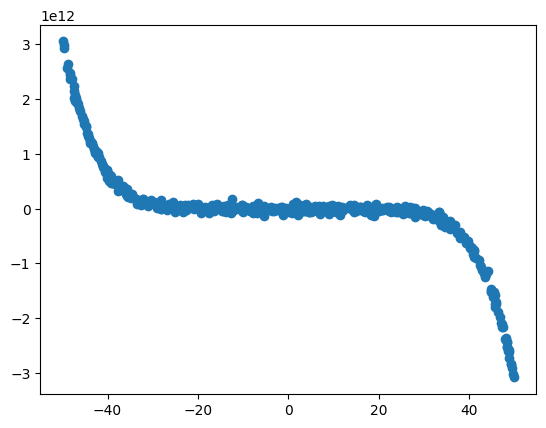

In [2]:
matdat = loadmat("problem1.mat")
x_var= matdat['x']
y_var = matdat['y']
plt.scatter(x_var, y_var)

In [12]:
from re import T


def polyreg(XData, YData, Dimension):
    TrainX, TestX, TrainY, TestY = train_test_split(x_var, y_var, test_size=0.5, random_state=5)
    XVector = TrainX.tolist()
    for entries in range(len(XVector)):
        XVector[entries].insert(0,1)
        for dims in range(2, Dimension + 1):
            XVector[entries].append(pow(XVector[entries][1], dims))
    XVector = np.array(XVector)

    XVectorTest = TrainX.tolist()
    for entries in range(len(XVector)):
        XVectorTest[entries].insert(0,1)
        for dims in range(2, Dimension + 1):
            XVectorTest[entries].append(pow(XVectorTest[entries][1], dims))
    XVectorTest = np.array(XVector)

    TrainVectorInverse = np.linalg.inv(np.dot(XVector.T, XVector))
    TrainTheta = np.dot(np.dot(TrainVectorInverse, XVector.T), TrainY)
    
    TrainPrediction = np.dot(XVector, TrainTheta)
    TrainLoss = (1/(len(XVector) * 2)) * np.sum(pow(TrainY - TrainPrediction, 2))
    TrainLossLog = math.log(TrainLoss)
    
    TestPrediction = np.dot(XVectorTest, TrainTheta)
    TestLoss = (1/(len(XVectorTest) * 2)) * np.sum(pow(TestY - TestPrediction, 2))
    TestLossLog = math.log(TestLoss)
    DifferenceOfLoss = math.log(abs((TestLoss) - (TrainLoss)))
    
    if Dimension in (1,2,3,4,5,6,7,8,9,10,20,21,22,23,24,25):
        plt.plot(TrainX, TrainY, 'r.', label='Training Data')
        plt.plot(TestX, TestY, 'g.', label='Testing Data')
        plt.plot(TrainX, TrainPrediction, 'b.', label='Training Prediction')
        plt.plot(TrainX, TestPrediction, 'y.', label='Testing Prediction')
        plt.title('Dimension = {}'.format(str(Dimension)))
        plt.show()
    return TrainLoss, TestLoss, TrainLossLog, TestLossLog, DifferenceOfLoss


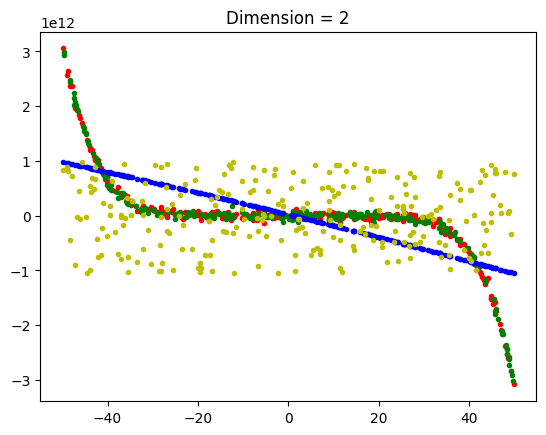

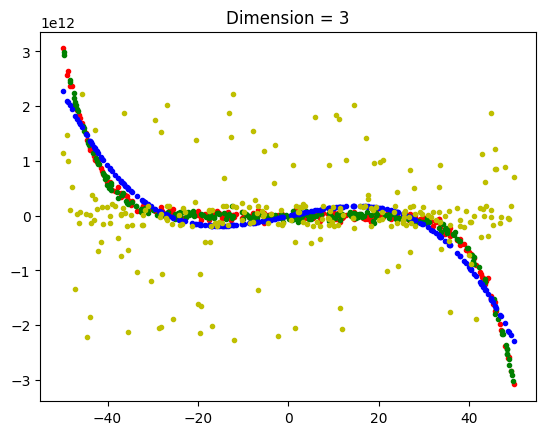

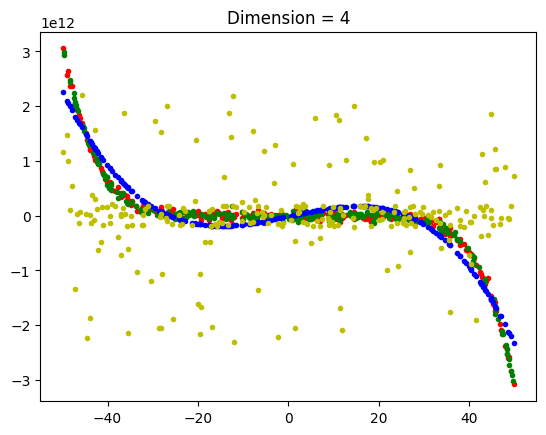

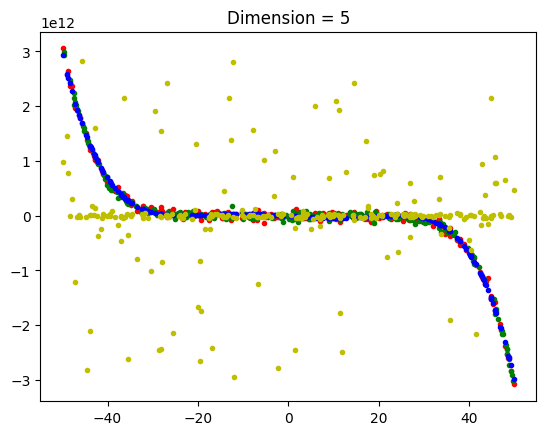

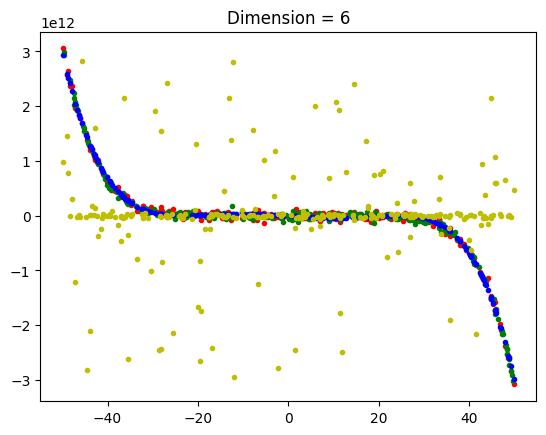

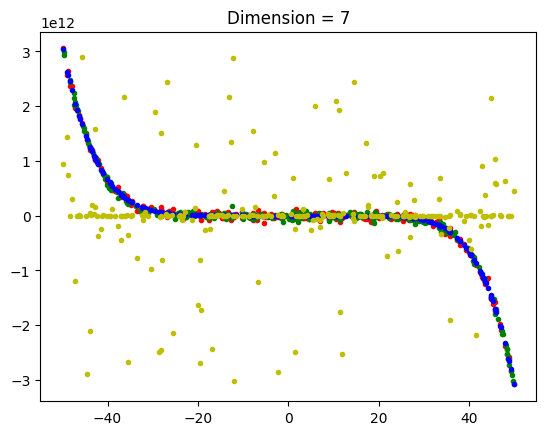

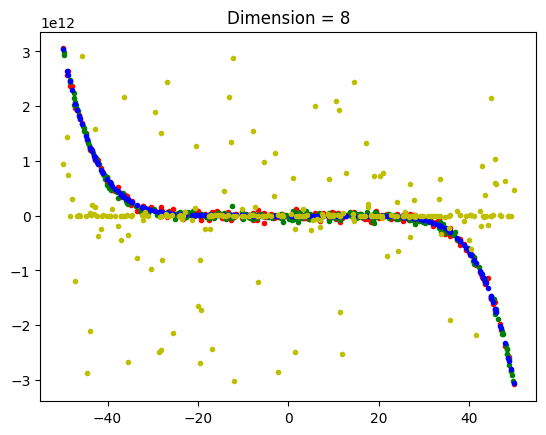

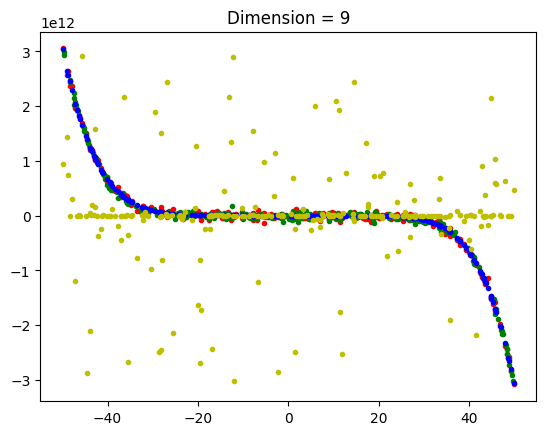

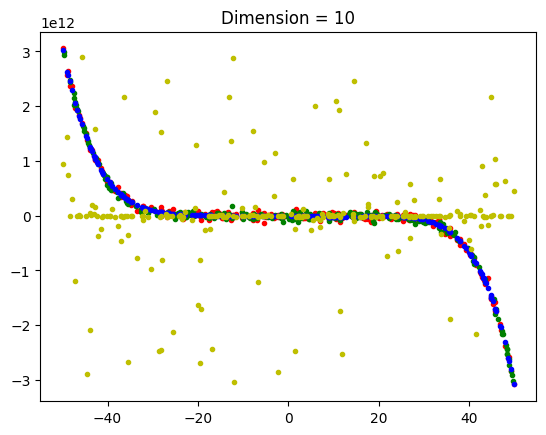

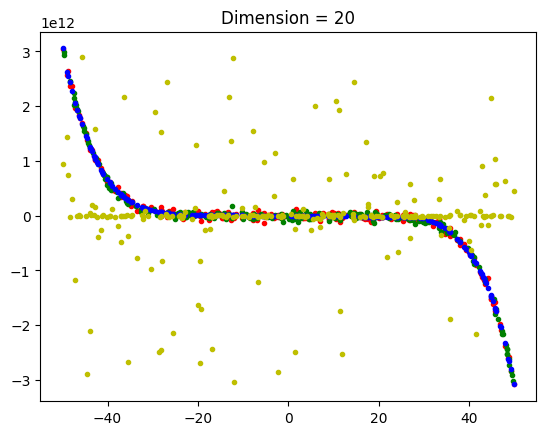

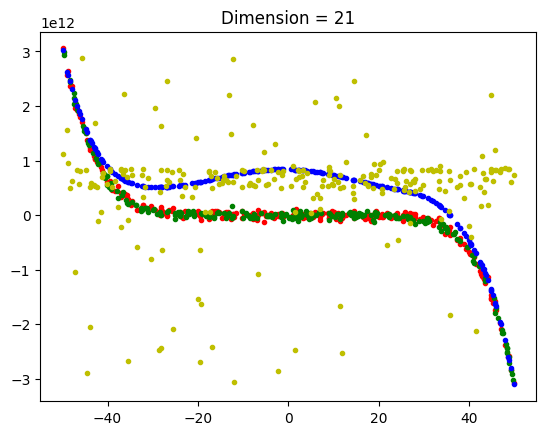

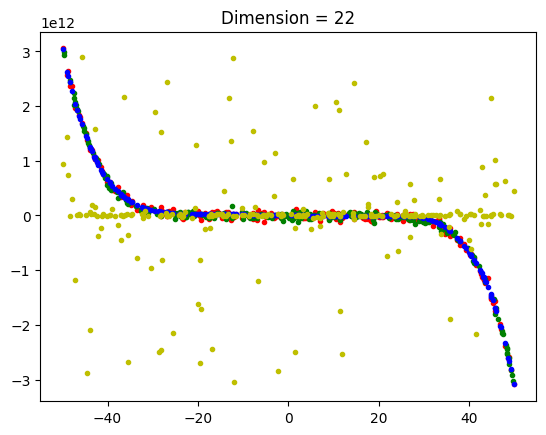

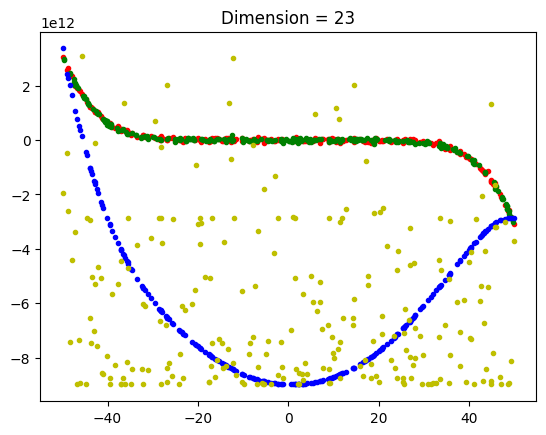

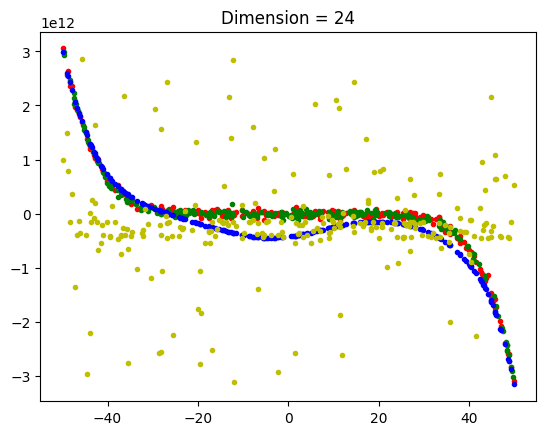

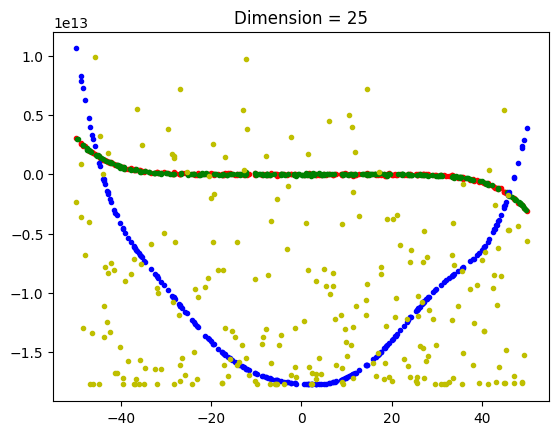

In [13]:
maxdim = 50
train_loss=[]
test_loss=[]
train_loss_log=[]
test_loss_log=[]
Diff_of_Loss=[]
for dim in range(2, maxdim):
    TrainLoss, TestLoss, TrainLossLog, TestLossLog, DifferenceOfLoss = polyreg(x_var, y_var, dim)
    train_loss.append(TrainLoss) 
    test_loss.append(TestLoss)
    train_loss_log.append(TrainLossLog)
    test_loss_log.append(TestLossLog)
    Diff_of_Loss.append(DifferenceOfLoss)
df = pd.DataFrame(list(zip(train_loss, test_loss, Diff_of_Loss, train_loss_log,test_loss_log)),columns =['Train Loss', 'Test Loss', 'Diff of Loss', 'TrainLossLog','TestLossLog'])
df

In [42]:
ValueList = []
maxdim = 50
for d in range(1, maxdim):
    ValueDir = {}
    ValueDir['Dimension'] = d
    
    X_Vector_Train, Theta1 = polyreg(x, y, d)
    Hypothesis = np.dot(X_Vector_Train, Theta1)
    TrainLoss = (1/(len(x) * 2)) * np.sum(pow(y- Hypothesis, 2))
    ValueDir['TrainLoss'] = TrainLoss
    ValueDir['TrainLossLog'] = math.log(TrainLoss)

    X_Vector_Test, Theta2 = polyreg(xT, yT, d)
    Hypothesis2 = np.dot(X_Vector_Test, Theta1)
    TestLoss = (1/(len(xT) * 2)) * np.sum(pow(yT - Hypothesis2, 2))
    ValueDir['TestLoss'] = TestLoss
    ValueDir['TestLossLog'] = math.log(TestLoss)

    ValueDir['DifferenceOfLoss'] = math.log(abs(ValueDir['TestLoss'] - ValueDir['TrainLoss']))

    ValueList.append(ValueDir)
    

print(json.dumps(ValueList, indent=3))

# TrainLossSort = sorted(ValueList, key=itemgetter('TrainLossLog'))
# LeastTrainLoss = TrainLossSort[0]['Dimension']
# TestLossSort = sorted(ValueList, key=itemgetter('TestLossLog'))
# LeastTestLoss = TestLossSort[0]['Dimension']
MinLossSort = sorted(ValueList, key=itemgetter('DifferenceOfLoss'))
DimensionOptimal = MinLossSort[0]['Dimension']
print(DimensionOptimal)

#print(LeastTrainLoss, LeastTrainLoss, DimensionOptimal)
#Now the Dimension we get is D-1, for optimal fit, we need to add 1 to the polynomial being fir
#DimensionOptimal = DimensionOptimal + 1

NameError: name 'x' is not defined